# Data 파악

In [21]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_interactions = pd.read_csv('RAW_interactions.csv')

In [3]:
review_rating = raw_interactions[['review', 'rating']]

In [4]:
review_rating.head()

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
1,"So simple, so delicious! Great for chilly fall...",5
2,This worked very well and is EASY. I used not...,4
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5


# review data info

In [5]:
review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 2 columns):
review    1132198 non-null object
rating    1132367 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.3+ MB


In [6]:
review_rating.isnull().sum()

review    169
rating      0
dtype: int64

# review_rating data have null data in 169 review

In [7]:
review_rating = review_rating[review_rating.review.notnull()]

In [8]:
review_rating.rating.value_counts()

5    816229
4    187333
0     60847
3     40852
2     14122
1     12815
Name: rating, dtype: int64

# review_rating data have 0 in 60847 rating

In [9]:
review_rating = review_rating[review_rating.rating != 0]

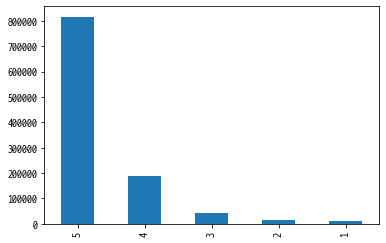

In [10]:
review_rating.rating.value_counts().plot(kind='bar')

In [11]:
normalized_text = []
for string in review_rating.review.tolist():
    try:
        tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)

In [12]:
normalized_text[:5]

['great with a salad cooked on top of stove for 15 minutes added a shake of cayenne and a pinch of salt used low fat sour cream thanks ',
 'so simple so delicious great for chilly fall evening should have doubled it br br second time around forgot the remaining cumin we usually love cumin but didn t notice the missing 1 2 teaspoon ',
 'this worked very well and is easy i used not quite a whole package 10oz of white chips great ',
 'i made the mexican topping and took it to bunko everyone loved it ',
 'made the cheddar bacon topping adding a sprinkling of black pepper yum ']

In [13]:
review = []
review = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
print('총 리뷰의 개수 : {}'.format(len(review)))

총 리뷰의 개수 : 1071351


In [15]:
for line in review[:3]: # 샘플 3개만 출력
    print(line)

['great', 'with', 'a', 'salad', 'cooked', 'on', 'top', 'of', 'stove', 'for', '15', 'minutes', 'added', 'a', 'shake', 'of', 'cayenne', 'and', 'a', 'pinch', 'of', 'salt', 'used', 'low', 'fat', 'sour', 'cream', 'thanks']
['so', 'simple', 'so', 'delicious', 'great', 'for', 'chilly', 'fall', 'evening', 'should', 'have', 'doubled', 'it', 'br', 'br', 'second', 'time', 'around', 'forgot', 'the', 'remaining', 'cumin', 'we', 'usually', 'love', 'cumin', 'but', 'didn', 't', 'notice', 'the', 'missing', '1', '2', 'teaspoon']
['this', 'worked', 'very', 'well', 'and', 'is', 'easy', 'i', 'used', 'not', 'quite', 'a', 'whole', 'package', '10oz', 'of', 'white', 'chips', 'great']


# Word2Vec Train

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=review, size=100, window=5, min_count=5, workers=4, sg=0)

In [17]:
model_result = model.wv.most_similar("well")
print(model_result)

[('nicely', 0.7599762678146362), ('welll', 0.6590306162834167), ('brilliantly', 0.6500575542449951), ('beautifully', 0.643996000289917), ('excellently', 0.6178208589553833), ('quickly', 0.6037153005599976), ('perfectly', 0.5967931151390076), ('fine', 0.5698121786117554), ('splendidly', 0.5542017221450806), ('smoothly', 0.5503041744232178)]


# Word2Vec Save and Load

In [18]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [20]:
model_result = loaded_model.most_similar("recipe")
print(model_result)

[('receipe', 0.8777291774749756), ('recipie', 0.8461401462554932), ('recepie', 0.7049120664596558), ('recipee', 0.6150203347206116), ('reciepe', 0.6108849048614502), ('reciped', 0.5963062047958374), ('receipt', 0.5953241586685181), ('recpie', 0.5469397902488708), ('reipe', 0.5403306484222412), ('reicpe', 0.5232769846916199)]


# Google Word2Vec Load

In [22]:
import gensim

# 구글의 사전 훈련된 Word2Vec 모델을 로드합니다.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [23]:
print(model.vectors.shape) # 모델의 크기 확인

(3000000, 300)


In [51]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [33]:
print('열의 개수: ',len(raw_interactions.columns))
print(raw_interactions.columns)

열의 개수:  5
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')


In [36]:
raw_interactions['review'].isnull().sum()

169

In [39]:
df = raw_interactions[raw_interactions.review.notnull()]

In [40]:
df.isnull().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

In [42]:
df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [44]:
review = [] # 리스트 선언
review.extend(list(df.review.values)) # 헤드라인의 값들을 리스트로 저장
review[:10] # 상위 5개만 출력

['Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.',
 "So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",
 'This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!',
 'I made the Mexican topping and took it to bunko.  Everyone loved it.',
 'Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!',
 "very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.",
 'Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not work well.  Sorry to report that the strawberries I did in Au

In [46]:
print('총 샘플의 개수 : {}'.format(len(review))) # 현재 샘플의 개수

총 샘플의 개수 : 1132198


In [47]:
def repreprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')
    return ''.join(c for c in s if c not in punctuation).lower() # 구두점 제거와 동시에 소문자화

text = [repreprocessing(x) for x in review]
text[:5]

['great with a salad cooked on top of stove for 15 minutesadded a shake of cayenne and a pinch of salt  used low fat sour cream  thanks',
 'so simple so delicious great for chilly fall evening should have doubled it brbrsecond time around forgot the remaining cumin we usually love cumin but didnt notice the missing 12 teaspoon',
 'this worked very well and is easy  i used not quite a whole package 10oz of white chips  great',
 'i made the mexican topping and took it to bunko  everyone loved it',
 'made the cheddar bacon topping adding a sprinkling of black pepper yum']

In [48]:
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 335028


In [54]:
sequences = list()

for line in text: 
    encoded = t.texts_to_sequences([line])[0] # 각 샘플에 대한 정수 인코딩
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11] # 11개의 샘플 출력

[[27, 13],
 [27, 13, 4],
 [27, 13, 4, 161],
 [27, 13, 4, 161, 138],
 [27, 13, 4, 161, 138, 24],
 [27, 13, 4, 161, 138, 24, 153],
 [27, 13, 4, 161, 138, 24, 153, 9],
 [27, 13, 4, 161, 138, 24, 153, 9, 856],
 [27, 13, 4, 161, 138, 24, 153, 9, 856, 8],
 [27, 13, 4, 161, 138, 24, 153, 9, 856, 8, 471],
 [27, 13, 4, 161, 138, 24, 153, 9, 856, 8, 471, 50280]]

In [59]:
index_to_word={}
for key, value in t.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : either


In [60]:
max_len=max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 4098


In [61]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

MemoryError: 